# Homework  — Stage 08 EDA

We use Yahoo Finance to import data of open, close, high, low, and volume of shares traded of Nvidia, Microsoft, Apple, Alphabet, and Amazon. 

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
# n = 160
# df = pd.DataFrame({
#     'date': pd.date_range('2021-02-01', periods=n, freq='D'),
#     'region': np.random.choice(['North','South','East','West'], size=n),
#     'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
#     'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
#     'transactions': np.random.poisson(lam=3, size=n),
# })
# base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
# df['spend'] = np.maximum(0, base).round(2)

# # inject a bit of missingness and outliers
# df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
# df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
# df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
# df.head()

### Importing project data set

import yfinance as yf
df = yf.download(['NVDA','MSFT','AAPL','GOOG','AMZN'], period='3mo', interval='1d') # .reset_index()[['Date','Close']]
# df.columns = ['date','adj_close']


/var/folders/dk/pzmx27fj0198nc95vcbfwgn00000gn/T/ipykernel_5079/2768082842.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['NVDA','MSFT','AAPL','GOOG','AMZN'], period='3mo', interval='1d') # .reset_index()[['Date','Close']]
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        NVDA   
Date                                                                     
2025-05-23  195.048645  200.990005  169.386398  449.441162  131.280884   
2025-05-27  199.983047  206.020004  173.771118  459.933899  135.490585   
2025-05-28  200.192795  204.720001  173.171860  456.609375  134.800644   
2025-05-29  199.723328  205.699997  172.752365  457.927216  139.180344   
2025-05-30  200.622314  205.009995  172.642487  459.604431  135.120621   

Price             High                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        NVDA   
Date                                                                     
2025-05-23  197.475883  202.369995  170.999465  452.945411  132.670787   
2025-05-27  200.512445  206.690002  174.080744  460.193482  135.650578   
2025-05-28  202.500174  207.660004  176.268129  461.760910  137.240477   
2025-05-29  203.578952  208.809998  175.189423  460.962235  143.480048   
2025-05-30  201.731057  205.990005  173.231775  460.922272  139.610299   

Price              Low                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        NVDA   
Date                                                                     
2025-05-23  193.240699  197.850006  169.056793  448.173257  129.151042   
2025-05-27  197.206185  202.190002  171.004455  455.371392  133.300735   
2025-05-28  199.673380  204.410004  172.807292  456.180088  134.780641   
2025-05-29  198.284958  204.229996  171.573774  454.562751  137.900434   
2025-05-30  196.556921  201.699997  168.322667  454.792365  132.910767   

Price             Open                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        NVDA   
Date                                                                     
2025-05-23  193.450453  198.899994  170.075572  449.241509  129.990980   
2025-05-27  198.075209  203.089996  171.094343  455.730817  134.140673   
2025-05-28  200.362600  205.919998  173.771130  460.463056  136.020560   
2025-05-29  203.349217  208.029999  174.789909  460.792501  142.240129   
2025-05-30  199.143981  204.839996  172.203012  458.965497  138.710368   

Price         Volume                                           
Ticker          AAPL      AMZN      GOOG      MSFT       NVDA  
Date                                                           
2025-05-23  78432900  33393500  24963600  16883500  198821300  
2025-05-27  56288500  34892000  24341300  20974300  192953600  
2025-05-28  45339700  28549800  25999200  17086300  304021100  
2025-05-29  51396800  34650000  21174700  13974800  369241900  
2025-05-30  70819900  51679400  36258300  34770500  333170900

## 1) First look

In [3]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-05-23 to 2025-08-22
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   63 non-null     float64
 1   (Close, AMZN)   63 non-null     float64
 2   (Close, GOOG)   63 non-null     float64
 3   (Close, MSFT)   63 non-null     float64
 4   (Close, NVDA)   63 non-null     float64
 5   (High, AAPL)    63 non-null     float64
 6   (High, AMZN)    63 non-null     float64
 7   (High, GOOG)    63 non-null     float64
 8   (High, MSFT)    63 non-null     float64
 9   (High, NVDA)    63 non-null     float64
 10  (Low, AAPL)     63 non-null     float64
 11  (Low, AMZN)     63 non-null     float64
 12  (Low, GOOG)     63 non-null     float64
 13  (Low, MSFT)     63 non-null     float64
 14  (Low, NVDA)     63 non-null     float64
 15  (Open, AAPL)    63 non-null     float64
 16  (Open, AMZN)    63 non-null     float64
 17  (Open, GOOG)    6

(None,
 Price   Ticker
 Close   AAPL      0
         AMZN      0
         GOOG      0
         MSFT      0
         NVDA      0
 High    AAPL      0
         AMZN      0
         GOOG      0
         MSFT      0
         NVDA      0
 Low     AAPL      0
         AMZN      0
         GOOG      0
         MSFT      0
         NVDA      0
 Open    AAPL      0
         AMZN      0
         GOOG      0
         MSFT      0
         NVDA      0
 Volume  AAPL      0
         AMZN      0
         GOOG      0
         MSFT      0
         NVDA      0
 dtype: int64)

## 2) Numeric profile

All of our columns are numeric in nature, so we only needed to perform numeric profiles. We get to see descriptive statistics and are able to see the relative distribution, mean, standard deviation across our 5 stocks over the past 3 months. 

We see that skewness values are within -1 < sk < 1 and kurtosis values are within -2 < kr < 2, which indicates that the distributions resemble a normal distribution. 

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
desc = df.describe().T

desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

count         mean         std          min          25%  \
Price  Ticker                                                             
Close  AAPL    63.00       209.71       10.76       195.05       201.04   
       AMZN    63.00       219.57        8.59       200.99       212.99   
       GOOG    63.00       184.66       12.07       166.01       174.93   
       MSFT    63.00       496.20       22.01       449.44       477.67   
       NVDA    63.00       161.23       16.31       131.28       144.14   
High   AAPL    63.00       211.94       10.68       197.35       203.49   
       AMZN    63.00       221.57        8.39       202.37       216.17   
       GOOG    63.00       186.43       12.04       168.48       177.52   
       MSFT    63.00       499.80       23.79       452.95       479.77   
       NVDA    63.00       162.83       16.40       132.67       145.11   
Low    AAPL    63.00       207.84       10.51       193.24       199.78   
       AMZN    63.00       217.41        8.60       197.85       211.38   
       GOOG    63.00       182.49       11.90       163.33       172.82   
       MSFT    63.00       492.98       22.19       448.17       473.02   
       NVDA    63.00       159.09       15.99       129.15       142.34   
Open   AAPL    63.00       209.76       10.64       193.45       201.53   
       AMZN    63.00       219.49        8.62       198.90       213.08   
       GOOG    63.00       184.44       11.96       167.32       174.83   
       MSFT    63.00       496.63       24.08       449.24       475.12   
       NVDA    63.00       161.02       16.38       129.99       143.68   
Volume AAPL    63.00  55656484.13 18946845.79  30621200.00  43312350.00   
       AMZN    63.00  42184358.73 19604623.00  25248900.00  31805750.00   
       GOOG    63.00  24832192.06 10088376.70  11768900.00  19168050.00   
       MSFT    63.00  19809053.97  6778525.26  11846600.00  15684950.00   
       NVDA    63.00 179880641.27 49198433.05 122316800.00 145971050.00   

                       50%          75%          max  skew  kurtosis  
Price  Ticker                                                         
Close  AAPL         208.81       213.58       233.33  0.82     -0.36  
       AMZN         221.47       225.91       234.11 -0.26     -0.95  
       GOOG         180.55       195.54       206.72  0.30     -1.26  
       MSFT         502.19       511.69       534.76 -0.35     -0.91  
       NVDA         164.07       175.57       183.16 -0.23     -1.43  
High   AAPL         211.19       215.07       235.12  0.81     -0.30  
       AMZN         223.05       226.97       236.53 -0.27     -0.66  
       GOOG         182.45       197.11       209.23  0.33     -1.24  
       MSFT         503.61       514.71       554.54 -0.14     -0.78  
       NVDA         164.50       177.79       184.48 -0.21     -1.46  
Low    AAPL         206.99       212.08       230.85  0.83     -0.31  
       AMZN         219.06       222.74       232.25 -0.22     -0.82  
       GOOG         178.00       192.56       203.41  0.31     -1.29  
       MSFT         496.98       508.94       531.03 -0.32     -1.00  
       NVDA         161.61       173.89       180.59 -0.23     -1.43  
Open   AAPL         208.98       213.72       234.06  0.86     -0.18  
       AMZN         221.07       225.49       235.77 -0.23     -0.65  
       GOOG         180.79       195.40       205.07  0.33     -1.28  
       MSFT         499.48       513.90       554.32 -0.08     -0.75  
       NVDA         163.72       175.01       182.96 -0.20     -1.44  
Volume AAPL    48974600.00  61398000.00 113854000.00  1.41      1.33  
       AMZN    36604300.00  41752900.00 122258800.00  2.73      7.54  
       GOOG    23627400.00  25954150.00  74053100.00  2.46      8.47  
       MSFT    17503100.00  21418350.00  51617300.00  2.28      6.80  
       NVDA   167694000.00 196121700.00 369241900.00  1.72      3.46

## 3) Distributions (TODO: add at least 3)

Based off of the descriptive statistics above, it appears that the smallest closing stock price standard deviation is Amazon at 8.59 and the largest is Microsoft at 22.01. As a result, we would like to look at the histograms of Amazon and Microsoft as well as examine if there exists any outliers in Microsoft's closing prices. 

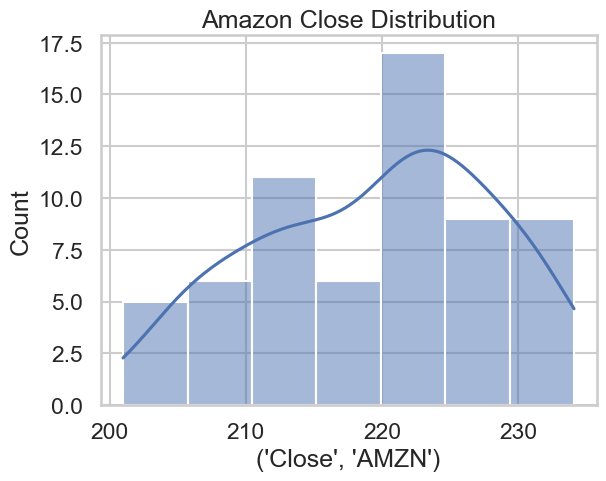

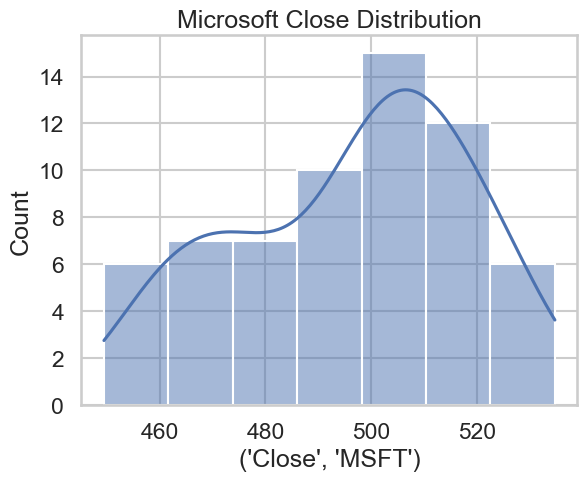

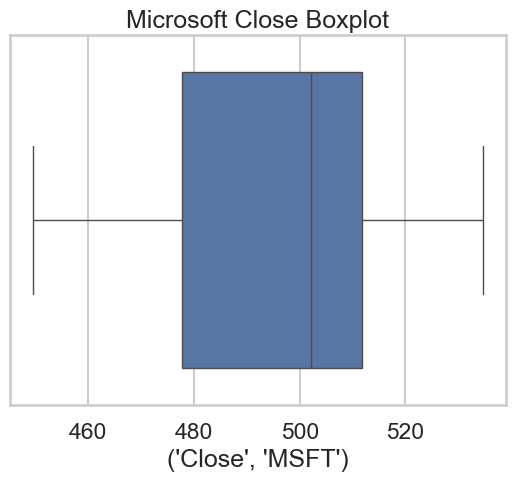

In [12]:
# Histogram of AMZN close
sns.histplot(df[('Close','AMZN')], kde=True)
plt.title('Amazon Close Distribution')
plt.show()

# Histogram of Microsoft close
sns.histplot(df[('Close','MSFT')], kde=True)
plt.title('Microsoft Close Distribution')
plt.show()

# Outliers in Microsoft close (boxplot)
sns.boxplot(x=df[('Close','MSFT')])
plt.title('Microsoft Close Boxplot')
plt.show()

Based off the graphs, it appears that both Amazon has a more centrally distributed histogram while Microsoft has a slight left skew. However, there doesn't appear to be any apparent outliers in Microsoft's closing prices so no observations are removed or imputed. 

This shows us Amazon has a more steady market cap valuation as opposed to Microsoft having few instances where the stock underperformed according to the average market cap. 

## 4) Relationships

Because Microsoft appears to have a fatter left tail, we're going to analyze it by exploring the bivariate reltaionship between open and close on MSFT to examine if there are any notable days where intraday movement was significant in nature. 

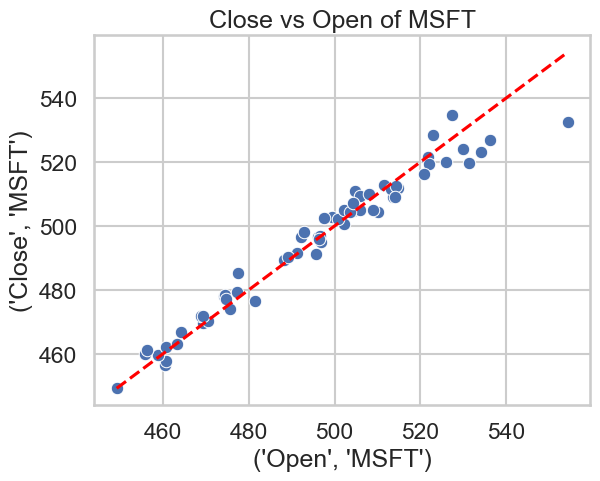

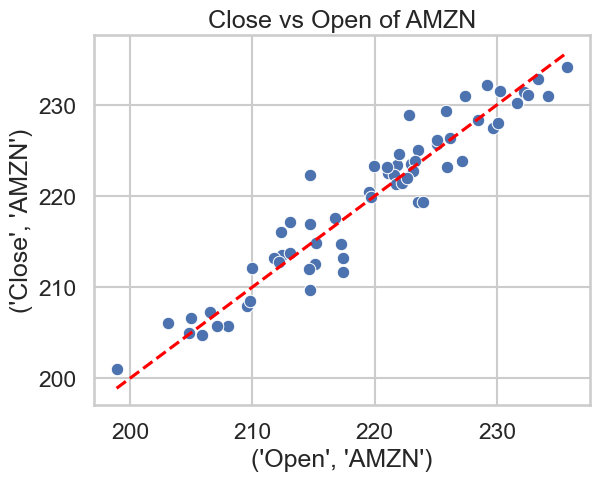

In [19]:
sns.scatterplot(data=df, x=('Open','MSFT'), y=('Close','MSFT'))
min_val = min(df[('Open','MSFT')].min(), df[('Close','MSFT')].min()) #ChatGPT consulted to create y = x line
max_val = max(df[('Open','MSFT')].max(), df[('Close','MSFT')].max()) #ChatGPT consulted to create y = x line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x (m=1)') #ChatGPT consulted to create y = x line
plt.title('Close vs Open of MSFT')
plt.show()



sns.scatterplot(data=df, x=('Open','AMZN'), y=('Close','AMZN'))
min_val = min(df[('Open','AMZN')].min(), df[('Close','AMZN')].min()) #ChatGPT consulted to create y = x line
max_val = max(df[('Open','AMZN')].max(), df[('Close','AMZN')].max()) #ChatGPT consulted to create y = x line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x (m=1)') #ChatGPT consulted to create y = x line
plt.title('Close vs Open of AMZN')
plt.show()


Surprisingly, it appears as though the intraday fluctuations aren't as drastic as we originally anticipated they would be. This likely means that there was no single shock event that caused Microsoft to decline in market cap, rather that it was a steady decline and subsequent increase that caused this. However, there still exists a few points where closing prices fell a measurable amount lower than the opening prices - which we may want to investigate further.

## 5) Insights & Assumptions


### Top 3 insights
- MSFT, with the largest standard deviation in Closing prices, has experienced a noticeable fluctuation in market cap
- AMZN has relatively stable market cap with no large fluctuations observed
- Viewing intraday fluctuations has seen that a couple of closing days for both MSFT and AMZN may warrant further investigation
  
### Assumptions & risks
- We assume that the distribution of prices would follow a normal distribution with clear centrality, which may not be appropriate for real-time market movements
- We assume that all significant movements occur between during market open times
- We assume that the determination for outliers doesn't misattribute min and max values as normal values instead of as outliers

- Risks include that the time was not really accounted for in this analysis, which is an important factor to consider
- Risks also include that skewness and kurtosis seemed heavily prevalent when looking at volume of shares traded - all of which were not examined at the present moment. 
  
### Next steps before modeling (cleaning & features)
- No cleaning is anticipated, however features that may want to be explored would be how these points line up with the independent axis accounting for time as the current
- We may also want to examine whether heavy skewness and kurtosis experienced in the volume of shares plays a part. Volume is historically known to be correlated with large shifts in price shifts. 